<a href="https://colab.research.google.com/github/cornelius152/Text-Classification---Data-Science-Internship/blob/main/BagofWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries & Packages**

In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import global libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import language libraries and packages
import nltk
nltk.download('punkt') # A pre-trained unsupervised machine learning model to tokenize text into individual words or sentences
nltk.download('averaged_perceptron_tagger') # For pos-tagger
nltk.download('omw-1.4') # Open Multilingual WordNet (OMW)

from nltk.corpus import stopwords
nltk.download('stopwords') # For 'English' stopwords

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') # For lemmatization 

pd.options.mode.chained_assignment = None  # default='warn' and I am disabling it

import warnings
warnings.filterwarnings('ignore', message='.*', category=UserWarning, module='sklearn') # To suppress precision score warning

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Files**

In [4]:
# Import files

# Unclassified (uc) data
uc_data = pd.read_csv('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/unique_unclassified_questions.csv')
uc_data = uc_data.rename(columns={'question': 'Question'})

# Classified (c) data
c_data = pd.read_excel('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/categorized_questions.xlsx')

# CDC dataset
cdc_data = pd.read_csv('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/Behavioral_Risk_Factor_Surveillance_System__BRFSS__Historical_Questions.csv')

# All classified data (c_data + cdc_data)
class_data = pd.concat([c_data, cdc_data])

# **Processor Function**

In [5]:
# Processor function to do everything in one go

# Create stopword variable holding all stopwords in English (nltk.download('stopwords'))
stopwords = stopwords.words('english')

# Create Porter- and Lancaster-stemmer objects
porter = PorterStemmer()
lancaster = LancasterStemmer()

# Create lemmatizer object
wordnet_lemmatizer = WordNetLemmatizer()

def processor(data, feature, tokens = 'tokens'):
    
    # Drop duplicate rows based on a specified feature, but "keep first" instance of duplicate and set "ignore_index" to true to reset indices
    data = data.drop_duplicates(subset=feature, keep='first', ignore_index=True)
    
    # Tokenize feature of textual data, and create new column with tokenized text (unigrams) (nltk.download('punkt'))
    data[tokens] = data[feature].apply(nltk.word_tokenize)
    
    # Lowercasing and removing stop words from tokenized text, and making sure all textual data is alphanumeric
    data[tokens] = data[tokens].apply(lambda x: [word.lower() for word in x if word not in (stopwords) and word.isalnum()])
    
    # Processing tokens into string and creating a separate column of this for later use
    data['str tokens'] = data[tokens].apply(lambda x: ' '.join(x))

    # Applying bigrams
    data['bigrams'] = data[tokens].apply(lambda x: list(nltk.bigrams(x)))
    
    # Applying porter stem
    data['porter stem'] = data[tokens].apply(lambda x: [porter.stem(word) for word in x])
    
    # Applying lancaster stem
    data['lancaster stem'] = data[tokens].apply(lambda x: [lancaster.stem(word) for word in x])
    
    # Lemmatization (nltk.download('wordnet'))
    data['lemma'] = data[tokens].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])
    
    # Pos-tagging (nltk.download('averaged_perceptron_tagger'))
    data['postag'] = data[tokens].apply(lambda x: nltk.pos_tag(x))
    
    return data

## Tokens

In [6]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the TOKENS feature
tokens_uc_data = pd.DataFrame(processor(uc_data, 'Question')['tokens'])
tokens_c_data = pd.DataFrame(processor(c_data, 'Question')['tokens'])
tokens_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['tokens'])

# Data in index 1, axis 0 for uc dataset was an empty list, so manually dropping it
tokens_uc_data = tokens_uc_data.drop(index=1)

# Concatenating all three dataframes into one
tokens_all_data = pd.concat([tokens_uc_data, tokens_c_data, tokens_cdc_data])

# Concatenating classified datasets: classified OH and CDC datasets
tokens_classified_data = pd.concat([tokens_c_data, tokens_cdc_data])

In [7]:
tokens_c_data.head(3)

,tokens
0,"[age, group]"
1,[gender]
2,"[when, thinking, discomforts, consuming, wheat..."


## Lemma


In [8]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the Lemma feature
lemma_uc_data = pd.DataFrame(processor(uc_data, 'Question')['lemma'])
lemma_c_data = pd.DataFrame(processor(c_data, 'Question')['lemma'])
lemma_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['lemma'])

# Data in index 1, axis 0 for uc dataset was an empty list, so manually dropping it
lemma_uc_data = lemma_uc_data.drop(index=1)

# Concatenating classified datasets: classified OH and CDC datasets
lemma_classified_data = pd.concat([lemma_c_data, lemma_cdc_data])

In [9]:
lemma_c_data.head(3)

,lemma
0,"[age, group]"
1,[gender]
2,"[when, thinking, discomfort, consuming, wheat,..."


## Porter

In [10]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the Porter Stem feature
porter_uc_data = pd.DataFrame(processor(uc_data, 'Question')['porter stem'])
porter_c_data = pd.DataFrame(processor(c_data, 'Question')['porter stem'])
porter_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['porter stem'])

# Data in index 1, axis 0 for uc dataset was an empty list, so manually dropping it
porter_uc_data = porter_uc_data.drop(index=1)

# Concatenating classified datasets: classified OH and CDC datasets
porter_classified_data = pd.concat([porter_c_data, porter_cdc_data])

In [11]:
porter_c_data.head(3)

,porter stem
0,"[age, group]"
1,[gender]
2,"[when, think, discomfort, consum, wheat, produ..."


## Lancaster

In [12]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the Lancaster Stem feature
lancaster_uc_data = pd.DataFrame(processor(uc_data, 'Question')['lancaster stem'])
lancaster_c_data = pd.DataFrame(processor(c_data, 'Question')['lancaster stem'])
lancaster_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['lancaster stem'])

# Data in index 1, axis 0 for uc dataset was an empty list, so manually dropping it
lancaster_uc_data = lancaster_uc_data.drop(index=1)

# Concatenating classified datasets: classified OH and CDC datasets
lancaster_classified_data = pd.concat([lancaster_c_data, lancaster_cdc_data])

In [13]:
lancaster_c_data.head(3)

,lancaster stem
0,"[ag, group]"
1,[gend]
2,"[when, think, discomfort, consum, whe, produc,..."


## Postag

In [14]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the Postag feature
postag_uc_data = pd.DataFrame(processor(uc_data, 'Question')['postag'])
postag_c_data = pd.DataFrame(processor(c_data, 'Question')['postag'])
postag_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['postag'])

# Data in index 1, axis 0 for uc dataset was an empty list, so manually dropping it
postag_uc_data = postag_uc_data.drop(index=1)

# Concatenating classified datasets: classified OH and CDC datasets
postag_classified_data = pd.concat([postag_c_data, postag_cdc_data])

In [15]:
postag_c_data.head(3)

,postag
0,"[(age, NN), (group, NN)]"
1,"[(gender, NN)]"
2,"[(when, WRB), (thinking, VBG), (discomforts, N..."


## Bigrams

In [16]:
# Applying processor function too the uc, c, and cdc datasets, and only grabbing the Bigrams feature
bigram_uc_data = pd.DataFrame(processor(uc_data, 'Question')['bigrams'])
bigram_c_data = pd.DataFrame(processor(c_data, 'Question')['bigrams'])
bigram_cdc_data = pd.DataFrame(processor(cdc_data, 'Question')['bigrams'])

# Dropping empty lists in dataframes
bigram_uc_data = bigram_uc_data[bigram_uc_data['bigrams'].map(len) > 0]
bigram_c_data = bigram_c_data[bigram_c_data['bigrams'].map(len) > 0]
bigram_cdc_data = bigram_cdc_data[bigram_cdc_data['bigrams'].map(len) > 0]

# Concatenating classified datasets: classified OH and CDC datasets
bigram_classified_data = pd.concat([bigram_c_data, bigram_cdc_data])

In [17]:
bigram_c_data.head(3)

,bigrams
0,"[(age, group)]"
2,"[(when, thinking), (thinking, discomforts), (d..."
3,"[(do, think), (think, diagnosed), (diagnosed, ..."


# **List Maker**

In [18]:
# Function to create one long list of separate sentences that are all of type string so that I can use them as inputs for my BoW model

# Function takes in two parameters: data as a dataframe; feature as the column of the dataframe
def list_maker(data, feature):
    data = data[feature] # Variable to hold the specific feature of the dataframe
    data_words = [] # Creating two empty lists to hold the words and sentences from the previous dataframe
    data_sents = []

    for lists in data: # Running a for loop through each row of the column of dataframe
        if len(lists) == 0: # Skip empty lists
            continue
        elif isinstance(lists[0], tuple):  # Check if list is a list of tuples - mainly doing this for postags
            words = ['_'.join(word) for word in lists]  # Join bigrams with a space
        else:
            words = lists  # Else, just use the list as is
        string = ' '.join(words) # Each row contains a list of tokens; so here I am joining words in the list and building one string, separated by a blank space (' ')
        data_words.append(string) # Appending the words to the empty data_words list

    data_sents = [word for word in data_words if word] # Going through each sentence in data_words, making sure it is a word, and appending that to the empty data_sents list
    
    return data_sents

## Tokens List

In [19]:
# Applying list_maker function to generate a list from TOKENS column of each processed dataset
tokens_uc_data_list = list_maker(tokens_uc_data, 'tokens')
tokens_c_data_list = list_maker(tokens_c_data, 'tokens')
tokens_cdc_data_list = list_maker(tokens_cdc_data, 'tokens')
tokens_all_data_list = list_maker(tokens_all_data, 'tokens')
tokens_classified_data_list = list_maker(tokens_classified_data, 'tokens')

## Lemma List

In [20]:
# Applying list_maker function to generate a list from LEMMA column of each processed dataset
lemma_uc_data_list = list_maker(lemma_uc_data, 'lemma')
lemma_c_data_list = list_maker(lemma_c_data, 'lemma')
lemma_cdc_data_list = list_maker(lemma_cdc_data, 'lemma')
lemma_classified_data_list = list_maker(lemma_classified_data, 'lemma')

## Porter List

In [21]:
# Applying list_maker function to generate a list from Porter column of each processed dataset
porter_uc_data_list = list_maker(porter_uc_data, 'porter stem')
porter_c_data_list = list_maker(porter_c_data, 'porter stem')
porter_cdc_data_list = list_maker(porter_cdc_data, 'porter stem')
porter_classified_data_list = list_maker(porter_classified_data, 'porter stem')

## Lancaster List

In [22]:
# Applying list_maker function to generate a list from Lancaster column of each processed dataset
lancaster_uc_data_list = list_maker(lancaster_uc_data, 'lancaster stem')
lancaster_c_data_list = list_maker(lancaster_c_data, 'lancaster stem')
lancaster_cdc_data_list = list_maker(lancaster_cdc_data, 'lancaster stem')
lancaster_classified_data_list = list_maker(lancaster_classified_data, 'lancaster stem')

## Postag List

In [23]:
# Applying list_maker function to generate a list from PosTag column of each processed dataset
postag_uc_data_list = list_maker(postag_uc_data, 'postag')
postag_c_data_list = list_maker(postag_c_data, 'postag')
postag_cdc_data_list = list_maker(postag_cdc_data, 'postag')
postag_classified_data_list = list_maker(postag_classified_data, 'postag')

## Bigrams List

In [24]:
# Applying list_maker function to generate a list from Bigrams column of each processed dataset
bigram_uc_data_list = list_maker(bigram_uc_data, 'bigrams')
bigram_c_data_list = list_maker(bigram_c_data, 'bigrams')
bigram_cdc_data_list = list_maker(bigram_cdc_data, 'bigrams')
bigram_classified_data_list = list_maker(bigram_classified_data, 'bigrams')

# **Bag of Words (BoW)**

In [25]:
# Import countvectorizer from sklearn to build Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
# Function to build Bag of Words dataframe

def bow(data_list, df_name): # Two parameters: data_list = list of words; and df_name = name of type string
    # Create CountVectorizer object
    vectorizer = CountVectorizer()

    # Fit and transform data using CountVectorizer
    bow_data = vectorizer.fit_transform(data_list)

    # Get feature names from CountVectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Convert bag of words to DataFrame
    df_name = pd.DataFrame(bow_data.toarray(), columns=feature_names)

    return df_name

## Tokens BoW Dataframe

In [27]:
# Implementing bow function on Tokenized data lists
tokens_uc_bow_df = bow(tokens_uc_data_list, 'uc_bow_df')
tokens_c_bow_df = bow(tokens_c_data_list, 'c_bow_df')
tokens_cdc_bow_df = bow(tokens_cdc_data_list, 'cdc_bow_df')
tokens_all_bow_df = bow(tokens_all_data_list, 'all_bow_df')
tokens_class_bow_df = bow(tokens_classified_data_list, 'class_bow_df')

In [28]:
tokens_c_bow_df.head(3)

,12,acid,address,addressing,affect,age,aloe,amino,annual,applies,...,what,wheat,when,where,which,whitening,whole,willing,would,you
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


## Lemma BoW Dataframe

In [29]:
# Implementing bow function on Lemma data lists
lemma_uc_bow_df = bow(lemma_uc_data_list, 'uc_bow_df')
lemma_c_bow_df = bow(lemma_c_data_list, 'c_bow_df')
lemma_cdc_bow_df = bow(lemma_cdc_data_list, 'cdc_bow_df')
lemma_class_bow_df = bow(lemma_classified_data_list, 'class_bow_df')

## Porter BoW Dataframe

In [30]:
# Implementing bow function on Porter data lists
porter_uc_bow_df = bow(porter_uc_data_list, 'uc_bow_df')
porter_c_bow_df = bow(porter_c_data_list, 'c_bow_df')
porter_cdc_bow_df = bow(porter_cdc_data_list, 'cdc_bow_df')
porter_class_bow_df = bow(porter_classified_data_list, 'class_bow_df')

## Lancaster BoW DataFrame

In [31]:
# Implementing bow function on Lancaster data lists
lancaster_uc_bow_df = bow(lancaster_uc_data_list, 'uc_bow_df')
lancaster_c_bow_df = bow(lancaster_c_data_list, 'c_bow_df')
lancaster_cdc_bow_df = bow(lancaster_cdc_data_list, 'cdc_bow_df')
lancaster_class_bow_df = bow(lancaster_classified_data_list, 'class_bow_df')

## Postag BoW Dataframe

In [32]:
# Implementing bow function on Postag data lists
postag_uc_bow_df = bow(postag_uc_data_list, 'uc_bow_df')
postag_c_bow_df = bow(postag_c_data_list, 'c_bow_df')
postag_cdc_bow_df = bow(postag_cdc_data_list, 'cdc_bow_df')
postag_class_bow_df = bow(postag_classified_data_list, 'class_bow_df')

## Bigram BoW Dataframe

In [33]:
# Implementing bow function on Bigram data lists
bigram_uc_bow_df = bow(bigram_uc_data_list, 'uc_bow_df')
bigram_c_bow_df = bow(bigram_c_data_list, 'c_bow_df')
bigram_cdc_bow_df = bow(bigram_cdc_data_list, 'cdc_bow_df')
bigram_class_bow_df = bow(bigram_classified_data_list, 'class_bow_df')

# **BoW Array**

In [34]:
# Function to convert BoW dataframes to numpy arrays
def arr_builder(bow_df):
    bow_as_array = np.array(bow_df.values) # Use values method on bow_df column to grab its values and then convert to numpy array

    return bow_as_array

## Tokens BoW Array

In [35]:
# Convert Tokens BoW dataframe to numpy array
tokens_c_bow_array = arr_builder(tokens_c_bow_df)
tokens_uc_bow_array = arr_builder(tokens_uc_bow_df)
tokens_cdc_bow_array = arr_builder(tokens_cdc_bow_df)
tokens_all_bow_array = arr_builder(tokens_all_bow_df)
tokens_class_bow_array = arr_builder(tokens_class_bow_df)

## Lemma BoW Array

In [36]:
# Convert Lemma BoW dataframe to numpy array
lemma_c_bow_array = arr_builder(lemma_c_bow_df)
lemma_uc_bow_array = arr_builder(lemma_uc_bow_df)
lemma_cdc_bow_array = arr_builder(lemma_cdc_bow_df)
lemma_class_bow_array = arr_builder(lemma_class_bow_df)

## Porter BoW Array

In [37]:
# Convert Porter BoW dataframe to numpy array
porter_c_bow_array = arr_builder(porter_c_bow_df)
porter_uc_bow_array = arr_builder(porter_uc_bow_df)
porter_cdc_bow_array = arr_builder(porter_cdc_bow_df)
porter_class_bow_array = arr_builder(porter_class_bow_df)

## Lancaster BoW Array

In [38]:
# Convert Lancaster BoW dataframe to numpy array
lancaster_c_bow_array = arr_builder(lancaster_c_bow_df)
lancaster_uc_bow_array = arr_builder(lancaster_uc_bow_df)
lancaster_cdc_bow_array = arr_builder(lancaster_cdc_bow_df)
lancaster_class_bow_array = arr_builder(lancaster_class_bow_df)

## Postag BoW Array

In [39]:
# Convert Postag BoW dataframe to numpy array
postag_c_bow_array = arr_builder(postag_c_bow_df)
postag_uc_bow_array = arr_builder(postag_uc_bow_df)
postag_cdc_bow_array = arr_builder(postag_cdc_bow_df)
postag_class_bow_array = arr_builder(postag_class_bow_df)

## Bigram BoW Array

In [40]:
# Convert Bigram BoW dataframe to numpy array
bigram_c_bow_array = arr_builder(bigram_c_bow_df)
bigram_uc_bow_array = arr_builder(bigram_uc_bow_df)
bigram_cdc_bow_array = arr_builder(bigram_cdc_bow_df)
bigram_class_bow_array = arr_builder(bigram_class_bow_df)

# **Supervised Learning**

# **Train-Test Split**

In [41]:
# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # Calling labelencoder to encode truth labels from string to numerical values

In [42]:
# Building train-test split function and encoding labels
def split(bow_df, original_data, test_size=0.2, random_state=42):

    # Encoding labels ----------------

    # Create label encoder object
    label_encoder = LabelEncoder()

    # Grabbing only topic labels
    topics_df = processor(original_data, 'Question')['Topic']

    # If statement for bigrams dataframes which had further processing compared to the others...
    if bow_df.equals(bigram_c_bow_df):
        # Find common index
        common_index = bigram_c_bow_df.index.intersection(topics_df.index)
        # Reindex dataframe using the common index
        topics_df = topics_df.reindex(common_index)
    if bow_df.equals(bigram_cdc_bow_df):
        # Find common index
        common_index = bigram_cdc_bow_df.index.intersection(topics_df.index)
        # Reindex dataframe using the common index
        topics_df = topics_df.reindex(common_index)
    if bow_df.equals(bigram_class_bow_df):
        # Find common index
        common_index = bigram_class_bow_df.index.intersection(topics_df.index)
        # Reindex dataframe using the common index
        topics_df = topics_df.reindex(common_index)

    # Encoding topic labels from classified dataset
    topics_encoded = label_encoder.fit_transform(topics_df)

    # Splitting data --------------------

    # Creating x variable
    x = bow_df
    x_arr = np.array(x)

    # Creating y variable
    y = topics_encoded
    y_arr = np.array(y)

    # Perform train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=test_size, random_state=random_state)

    # Return the split data
    return x_train, x_test, y_train, y_test

## Tokens Train-Test Split

In [43]:
# Calling function to build tokens train-test sets for all relevant datasets

# Classified OH data
x_train_tokens_c_data, x_test_tokens_c_data, y_train_tokens_c_data, y_test_tokens_c_data = split(tokens_c_bow_df, c_data)

# CDC data
x_train_tokens_cdc_data, x_test_tokens_cdc_data, y_train_tokens_cdc_data, y_test_tokens_cdc_data = split(tokens_cdc_bow_df, cdc_data)

# All classified data
x_train_tokens_class_data, x_test_tokens_class_data, y_train_tokens_class_data, y_test_tokens_class_data= split(tokens_class_bow_df, class_data)

## Lemma Train-Test Split

In [44]:
# Calling function to build lemma train-test sets for all relevant datasets

# Classified OH data
x_train_lemma_c_data, x_test_lemma_c_data, y_train_lemma_c_data, y_test_lemma_c_data = split(lemma_c_bow_df, c_data)

# CDC data
x_train_lemma_cdc_data, x_test_lemma_cdc_data, y_train_lemma_cdc_data, y_test_lemma_cdc_data = split(lemma_cdc_bow_df, cdc_data)

# All classified data
x_train_lemma_class_data, x_test_lemma_class_data, y_train_lemma_class_data, y_test_lemma_class_data= split(lemma_class_bow_df, class_data)

## Porter Train-Test Split

In [45]:
# Calling function to build Porter train-test sets for all relevant datasets

# Classified OH data
x_train_porter_c_data, x_test_porter_c_data, y_train_porter_c_data, y_test_porter_c_data = split(porter_c_bow_df, c_data)

# CDC data
x_train_porter_cdc_data, x_test_porter_cdc_data, y_train_porter_cdc_data, y_test_porter_cdc_data = split(porter_cdc_bow_df, cdc_data)

# All classified data
x_train_porter_class_data, x_test_porter_class_data, y_train_porter_class_data, y_test_porter_class_data= split(porter_class_bow_df, class_data)

## Lancaster Train-Test Split

In [46]:
# Calling function to build Lancaster train-test sets for all relevant datasets

# Classified OH data
x_train_lancaster_c_data, x_test_lancaster_c_data, y_train_lancaster_c_data, y_test_lancaster_c_data = split(lancaster_c_bow_df, c_data)

# CDC data
x_train_lancaster_cdc_data, x_test_lancaster_cdc_data, y_train_lancaster_cdc_data, y_test_lancaster_cdc_data = split(lancaster_cdc_bow_df, cdc_data)

# All classified data
x_train_lancaster_class_data, x_test_lancaster_class_data, y_train_lancaster_class_data, y_test_lancaster_class_data= split(lancaster_class_bow_df, class_data)

## Postag Train-Test Split

In [47]:
# Calling function to build postag train-test sets for all relevant datasets

# Classified OH data
x_train_postag_c_data, x_test_postag_c_data, y_train_postag_c_data, y_test_postag_c_data = split(postag_c_bow_df, c_data)

# CDC data
x_train_postag_cdc_data, x_test_postag_cdc_data, y_train_postag_cdc_data, y_test_postag_cdc_data = split(postag_cdc_bow_df, cdc_data)

# All classified data
x_train_postag_class_data, x_test_postag_class_data, y_train_postag_class_data, y_test_postag_class_data= split(postag_class_bow_df, class_data)

## Bigram Train-Test Split

In [48]:
# Calling function to build bigram train-test sets for all relevant datasets

# Classified OH data
x_train_bigram_c_data, x_test_bigram_c_data, y_train_bigram_c_data, y_test_bigram_c_data = split(bigram_c_bow_df, c_data)

# CDC data
x_train_bigram_cdc_data, x_test_bigram_cdc_data, y_train_bigram_cdc_data, y_test_bigram_cdc_data = split(bigram_cdc_bow_df, cdc_data)

# All classified data
x_train_bigram_class_data, x_test_bigram_class_data, y_train_bigram_class_data, y_test_bigram_class_data= split(bigram_class_bow_df, class_data)

# **Linear Regression**

In [49]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error

In [50]:
# Building Linear Regression function
def linear_regression(x_train, x_test, y_train, y_test):
    # Create linear regression object and fit model
    model = LinearRegression().fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate R2 and MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f' r2 value: {r2}')
    print(f'mae value: {mae}')

## Tokens Linear Regression

In [51]:
# Classified OH data
print('Evaluation scores for c_data -------')
linear_regression(x_train_tokens_c_data, x_test_tokens_c_data, y_train_tokens_c_data, y_test_tokens_c_data)
print()

# CDC data
print('Evaluation scores for cdc_data -------')
linear_regression(x_train_tokens_cdc_data, x_test_tokens_cdc_data, y_train_tokens_cdc_data, y_test_tokens_cdc_data)
print()

# All classified data
print('Evaluation scores for class_data -------')
linear_regression(x_train_tokens_class_data, x_test_tokens_class_data, y_train_tokens_class_data, y_test_tokens_class_data)

Evaluation scores for c_data -------
 r2 value: 0.5631393712222186
mae value: 1.8681581349974699

Evaluation scores for cdc_data -------
 r2 value: -1.760336004830792e+25
mae value: 67657852238064.63

Evaluation scores for class_data -------
 r2 value: -7.64590980560604e+24
mae value: 43162391421639.82


## Bigrams Linear Regression

In [52]:
# Classified OH data
print('Evaluation scores for c_data -------')
linear_regression(x_train_bigram_c_data, x_test_bigram_c_data, y_train_bigram_c_data, y_test_bigram_c_data)
print()

# CDC data
print('Evaluation scores for cdc_data -------')
linear_regression(x_train_bigram_cdc_data, x_test_bigram_cdc_data, y_train_bigram_cdc_data, y_test_bigram_cdc_data)
print()

# All classified data
print('Evaluation scores for class_data -------')
linear_regression(x_train_bigram_class_data, x_test_bigram_class_data, y_train_bigram_class_data, y_test_bigram_class_data)

Evaluation scores for c_data -------
 r2 value: 0.06778445913779041
mae value: 3.4846454616113367

Evaluation scores for cdc_data -------
 r2 value: -4.167556465996501e+26
mae value: 375172860871474.0

Evaluation scores for class_data -------
 r2 value: -2.1615835165426123e+26
mae value: 216582692721893.3


## Lemma Linear Regression

In [53]:
# Classified OH data
print('Evaluation scores for c_data -------')
linear_regression(x_train_lemma_c_data, x_test_lemma_c_data, y_train_lemma_c_data, y_test_lemma_c_data)
print()

# CDC data
print('Evaluation scores for cdc_data -------')
linear_regression(x_train_lemma_cdc_data, x_test_lemma_cdc_data, y_train_lemma_cdc_data, y_test_lemma_cdc_data)
print()

# All classified data
print('Evaluation scores for class_data -------')
linear_regression(x_train_lemma_class_data, x_test_lemma_class_data, y_train_lemma_class_data, y_test_lemma_class_data)

Evaluation scores for c_data -------
 r2 value: 0.5777208247262
mae value: 1.8143810824973197

Evaluation scores for cdc_data -------
 r2 value: -2.8621003488791498e+23
mae value: 7966695657246.847

Evaluation scores for class_data -------
 r2 value: -6.36767374708112e+23
mae value: 13602570592649.578


## Porter Linear Regression

In [54]:
# Classified OH data
print('Evaluation scores for c_data -------')
linear_regression(x_train_porter_c_data, x_test_porter_c_data, y_train_porter_c_data, y_test_porter_c_data)
print()

# CDC data
print('Evaluation scores for cdc_data -------')
linear_regression(x_train_porter_cdc_data, x_test_porter_cdc_data, y_train_porter_cdc_data, y_test_porter_cdc_data)
print()

# All classified data
print('Evaluation scores for class_data -------')
linear_regression(x_train_porter_class_data, x_test_porter_class_data, y_train_porter_class_data, y_test_porter_class_data)

Evaluation scores for c_data -------
 r2 value: 0.5723638524490957
mae value: 1.7992553272615774

Evaluation scores for cdc_data -------
 r2 value: -1.3985514216782518e+24
mae value: 6748189071535.3

Evaluation scores for class_data -------
 r2 value: -3.3199296776432256e+24
mae value: 26366580213592.082


## Lancaster Linear Regression

In [55]:
# Classified OH data
print('Evaluation scores for c_data -------')
linear_regression(x_train_lancaster_c_data, x_test_lancaster_c_data, y_train_lancaster_c_data, y_test_lancaster_c_data)
print()

# CDC data
print('Evaluation scores for cdc_data -------')
linear_regression(x_train_lancaster_cdc_data, x_test_lancaster_cdc_data, y_train_lancaster_cdc_data, y_test_lancaster_cdc_data)
print()

# All classified data
print('Evaluation scores for class_data -------')
linear_regression(x_train_lancaster_class_data, x_test_lancaster_class_data, y_train_lancaster_class_data, y_test_lancaster_class_data)

Evaluation scores for c_data -------
 r2 value: 0.5677122833804119
mae value: 1.9048888085560962

Evaluation scores for cdc_data -------
 r2 value: -8.22893948121645e+23
mae value: 14390771476321.758

Evaluation scores for class_data -------
 r2 value: -1.792257484473006e+22
mae value: 1545220688427.7532


## Postag Linear Regression

In [56]:
# Classified OH data
print('Evaluation scores for c_data -------')
linear_regression(x_train_postag_c_data, x_test_postag_c_data, y_train_postag_c_data, y_test_postag_c_data)
print()

# CDC data
print('Evaluation scores for cdc_data -------')
linear_regression(x_train_postag_cdc_data, x_test_postag_cdc_data, y_train_postag_cdc_data, y_test_postag_cdc_data)
print()

# All classified data
print('Evaluation scores for class_data -------')
linear_regression(x_train_postag_class_data, x_test_postag_class_data, y_train_postag_class_data, y_test_postag_class_data)

Evaluation scores for c_data -------
 r2 value: 0.5190784964577302
mae value: 2.1013489094832902

Evaluation scores for cdc_data -------
 r2 value: -9.516774802700955e+25
mae value: 124062038025807.83

Evaluation scores for class_data -------
 r2 value: -2.280120663906795e+24
mae value: 31254307827336.27


# **Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [58]:
# Building logistic regression function

def logistic_regression(x_train, x_test, y_train, y_test):
    # Create logistic regression object and fit model
    lr_model = LogisticRegression(random_state=42, max_iter=10000).fit(x_train, y_train)

    # Make predictions
    y_pred = lr_model.predict(x_test)

    # Evaluate model
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, np.round(y_pred), average='macro'), 3)
    precision = round(precision_score(y_test, y_pred, average='macro'), 3)
    recall = round(recall_score(y_test, y_pred, average='macro'), 3)

    print(f'Accuracy: {accuracy * 100.0:.2f}%')
    print(f'F1: {f1 * 100.0:.2f}%')
    print(f'precision: {precision * 100.0:.2f}%')
    print(f'Recall: {recall * 100.0:.2f}%')

## Tokens Logistic Regression

In [59]:
# Classified OH data
print('Accuracy score for c_data -------')
logistic_regression(x_train_tokens_c_data, x_test_tokens_c_data, y_train_tokens_c_data, y_test_tokens_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
logistic_regression(x_train_tokens_cdc_data, x_test_tokens_cdc_data, y_train_tokens_cdc_data, y_test_tokens_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
logistic_regression(x_train_tokens_class_data, x_test_tokens_class_data, y_train_tokens_class_data, y_test_tokens_class_data)

Accuracy score for c_data -------
Accuracy: 53.80%
F1: 31.20%
precision: 32.50%
Recall: 32.50%

Accuracy score for cdc_data -------
Accuracy: 69.10%
F1: 46.80%
precision: 47.90%
Recall: 49.20%

Accuracy score for class_data -------
Accuracy: 69.30%
F1: 47.70%
precision: 48.90%
Recall: 49.50%


## Lemma Logistic Regression

In [60]:
# Classified OH data
print('Accuracy score for c_data -------')
logistic_regression(x_train_lemma_c_data, x_test_lemma_c_data, y_train_lemma_c_data, y_test_lemma_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
logistic_regression(x_train_lemma_cdc_data, x_test_lemma_cdc_data, y_train_lemma_cdc_data, y_test_lemma_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
logistic_regression(x_train_lemma_class_data, x_test_lemma_class_data, y_train_lemma_class_data, y_test_lemma_class_data)

Accuracy score for c_data -------
Accuracy: 53.80%
F1: 31.50%
precision: 31.20%
Recall: 32.50%

Accuracy score for cdc_data -------
Accuracy: 69.10%
F1: 47.20%
precision: 48.40%
Recall: 49.50%

Accuracy score for class_data -------
Accuracy: 69.90%
F1: 46.80%
precision: 47.80%
Recall: 49.00%


## Porter Logistic Regression

In [61]:
# Classified OH data
print('Accuracy score for c_data -------')
logistic_regression(x_train_porter_c_data, x_test_porter_c_data, y_train_porter_c_data, y_test_porter_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
logistic_regression(x_train_porter_cdc_data, x_test_porter_cdc_data, y_train_porter_cdc_data, y_test_porter_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
logistic_regression(x_train_porter_class_data, x_test_porter_class_data, y_train_porter_class_data, y_test_porter_class_data)

Accuracy score for c_data -------
Accuracy: 61.50%
F1: 33.20%
precision: 31.90%
Recall: 35.00%

Accuracy score for cdc_data -------
Accuracy: 67.60%
F1: 45.40%
precision: 46.80%
Recall: 48.30%

Accuracy score for class_data -------
Accuracy: 69.30%
F1: 48.10%
precision: 49.30%
Recall: 50.60%


## Lancaster Logistic Regression

In [62]:
# Classified OH data
print('Accuracy score for c_data -------')
logistic_regression(x_train_lancaster_c_data, x_test_lancaster_c_data, y_train_lancaster_c_data, y_test_lancaster_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
logistic_regression(x_train_lancaster_cdc_data, x_test_lancaster_cdc_data, y_train_lancaster_cdc_data, y_test_lancaster_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
logistic_regression(x_train_lancaster_class_data, x_test_lancaster_class_data, y_train_lancaster_class_data, y_test_lancaster_class_data)

Accuracy score for c_data -------
Accuracy: 61.50%
F1: 33.20%
precision: 31.90%
Recall: 35.00%

Accuracy score for cdc_data -------
Accuracy: 68.50%
F1: 46.10%
precision: 47.60%
Recall: 48.70%

Accuracy score for class_data -------
Accuracy: 69.30%
F1: 47.30%
precision: 48.70%
Recall: 49.80%


## Bigrams Logistic Regression

In [63]:
# Classified OH data
print('Accuracy score for c_data -------')
logistic_regression(x_train_bigram_c_data, x_test_bigram_c_data, y_train_bigram_c_data, y_test_bigram_c_data)
print()

# CDC Data
print('Accuracy score for cdc_data -------')
logistic_regression(x_train_bigram_cdc_data, x_test_bigram_cdc_data, y_train_bigram_cdc_data, y_test_bigram_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
logistic_regression(x_train_bigram_class_data, x_test_bigram_class_data, y_train_bigram_class_data, y_test_bigram_class_data)

Accuracy score for c_data -------
Accuracy: 41.70%
F1: 21.30%
precision: 18.10%
Recall: 28.10%

Accuracy score for cdc_data -------
Accuracy: 24.80%
F1: 14.30%
precision: 16.20%
Recall: 15.60%

Accuracy score for class_data -------
Accuracy: 14.70%
F1: 8.00%
precision: 10.10%
Recall: 8.00%


## Postag Logistic Regression

In [64]:
# Classified OH data
print('Accuracy score for c_data -------')
logistic_regression(x_train_postag_c_data, x_test_postag_c_data, y_train_postag_c_data, y_test_postag_c_data)
print()

# CDC Data
print('Accuracy score for cdc_data -------')
logistic_regression(x_train_postag_cdc_data, x_test_postag_cdc_data, y_train_postag_cdc_data, y_test_postag_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
logistic_regression(x_train_postag_class_data, x_test_postag_class_data, y_train_postag_class_data, y_test_postag_class_data)

Accuracy score for c_data -------
Accuracy: 53.80%
F1: 31.20%
precision: 32.50%
Recall: 32.50%

Accuracy score for cdc_data -------
Accuracy: 66.40%
F1: 45.30%
precision: 46.50%
Recall: 47.60%

Accuracy score for class_data -------
Accuracy: 65.80%
F1: 43.80%
precision: 45.60%
Recall: 45.50%


# **Decision Tree**

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
def decision_tree(x_train, x_test, y_train, y_test):
    # Create decision tree object and fit classifier
    clf = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)

    # Make predictions
    y_pred = clf.predict(x_test)

    # Evaluate accuracy and F1
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, np.round(y_pred), average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("F1 score: %.2f%%" % (f1 * 100.0))
    print("Precision score: %.2f%%" % (precision * 100.0))
    print("Recall score: %.2f%%" % (recall * 100.0))

## Tokens Decision Tree

In [67]:
# Classified OH data
print('Accuracy score for c_data -------')
decision_tree(x_train_tokens_c_data, x_test_tokens_c_data, y_train_tokens_c_data, y_test_tokens_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
decision_tree(x_train_tokens_cdc_data, x_test_tokens_cdc_data, y_train_tokens_cdc_data, y_test_tokens_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
decision_tree(x_train_tokens_class_data, x_test_tokens_class_data, y_train_tokens_class_data, y_test_tokens_class_data)

Accuracy score for c_data -------
Accuracy: 61.54%
F1 score: 33.33%
Precision score: 34.38%
Recall score: 32.50%

Accuracy score for cdc_data -------
Accuracy: 62.73%
F1 score: 44.60%
Precision score: 45.21%
Recall score: 47.66%

Accuracy score for class_data -------
Accuracy: 63.16%
F1 score: 38.29%
Precision score: 38.77%
Recall score: 42.62%


## Lemma Decision Tree

In [68]:
# Classified OH data
print('Accuracy score for c_data -------')
decision_tree(x_train_lemma_c_data, x_test_lemma_c_data, y_train_lemma_c_data, y_test_lemma_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
decision_tree(x_train_lemma_cdc_data, x_test_lemma_cdc_data, y_train_lemma_cdc_data, y_test_lemma_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
decision_tree(x_train_lemma_class_data, x_test_lemma_class_data, y_train_lemma_class_data, y_test_lemma_class_data)

Accuracy score for c_data -------
Accuracy: 46.15%
F1 score: 24.87%
Precision score: 27.78%
Recall score: 26.67%

Accuracy score for cdc_data -------
Accuracy: 62.73%
F1 score: 41.51%
Precision score: 41.63%
Recall score: 45.32%

Accuracy score for class_data -------
Accuracy: 65.50%
F1 score: 40.85%
Precision score: 41.57%
Recall score: 43.11%


## Porter Decision Tree

In [69]:
# Classified OH data
print('Accuracy score for c_data -------')
decision_tree(x_train_porter_c_data, x_test_porter_c_data, y_train_porter_c_data, y_test_porter_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
decision_tree(x_train_porter_cdc_data, x_test_porter_cdc_data, y_train_porter_cdc_data, y_test_porter_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
decision_tree(x_train_porter_class_data, x_test_porter_class_data, y_train_porter_class_data, y_test_porter_class_data)

Accuracy score for c_data -------
Accuracy: 61.54%
F1 score: 37.96%
Precision score: 44.44%
Recall score: 34.44%

Accuracy score for cdc_data -------
Accuracy: 63.33%
F1 score: 43.93%
Precision score: 45.03%
Recall score: 46.00%

Accuracy score for class_data -------
Accuracy: 60.23%
F1 score: 36.06%
Precision score: 37.90%
Recall score: 38.68%


## Lancaster Decision Tree

In [70]:
# Classified OH data
print('Accuracy score for c_data -------')
decision_tree(x_train_lancaster_c_data, x_test_lancaster_c_data, y_train_lancaster_c_data, y_test_lancaster_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
decision_tree(x_train_lancaster_cdc_data, x_test_lancaster_cdc_data, y_train_lancaster_cdc_data, y_test_lancaster_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
decision_tree(x_train_lancaster_class_data, x_test_lancaster_class_data, y_train_lancaster_class_data, y_test_lancaster_class_data)

Accuracy score for c_data -------
Accuracy: 53.85%
F1 score: 32.59%
Precision score: 34.38%
Recall score: 32.50%

Accuracy score for cdc_data -------
Accuracy: 61.82%
F1 score: 42.82%
Precision score: 44.16%
Recall score: 45.34%

Accuracy score for class_data -------
Accuracy: 64.33%
F1 score: 37.67%
Precision score: 39.41%
Recall score: 39.79%


## Bigram Decision Tree

In [71]:
# Classified OH data
print('Accuracy score for c_data -------')
decision_tree(x_train_bigram_c_data, x_test_bigram_c_data, y_train_bigram_c_data, y_test_bigram_c_data)
print()

# CDC Data
print('Accuracy score for cdc_data -------')
decision_tree(x_train_bigram_cdc_data, x_test_bigram_cdc_data, y_train_bigram_cdc_data, y_test_bigram_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
decision_tree(x_train_bigram_class_data, x_test_bigram_class_data, y_train_bigram_class_data, y_test_bigram_class_data)

Accuracy score for c_data -------
Accuracy: 41.67%
F1 score: 28.04%
Precision score: 33.33%
Recall score: 25.00%

Accuracy score for cdc_data -------
Accuracy: 22.73%
F1 score: 14.96%
Precision score: 16.82%
Recall score: 16.31%

Accuracy score for class_data -------
Accuracy: 15.54%
F1 score: 10.57%
Precision score: 12.15%
Recall score: 10.59%


## Postag Decision Tree

In [72]:
# Classified OH data
print('Accuracy score for c_data -------')
decision_tree(x_train_postag_c_data, x_test_postag_c_data, y_train_postag_c_data, y_test_postag_c_data)
print()

# CDC Data
print('Accuracy score for cdc_data -------')
decision_tree(x_train_postag_cdc_data, x_test_postag_cdc_data, y_train_postag_cdc_data, y_test_postag_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
decision_tree(x_train_postag_class_data, x_test_postag_class_data, y_train_postag_class_data, y_test_postag_class_data)

Accuracy score for c_data -------
Accuracy: 38.46%
F1 score: 14.64%
Precision score: 17.86%
Recall score: 17.50%

Accuracy score for cdc_data -------
Accuracy: 57.27%
F1 score: 39.96%
Precision score: 42.05%
Recall score: 42.43%

Accuracy score for class_data -------
Accuracy: 60.53%
F1 score: 36.89%
Precision score: 39.62%
Recall score: 40.10%


# **Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
def random_forest(x_train, x_test, y_train, y_test):
    # Create random forest object and fit classifier
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42).fit(x_train, y_train)

    # Make predictions
    y_pred = rf_clf.predict(x_test)

    # Evaluate model
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, np.round(y_pred), average='macro'), 3)
    precision = round(precision_score(y_test, y_pred, average='macro'), 3)
    recall = round(recall_score(y_test, y_pred, average='macro'), 3)

    print(f'Accuracy: {accuracy * 100.0:.2f}%')
    print(f'F1: {f1 * 100.0:.2f}%')
    print(f'precision: {precision * 100.0:.2f}%')
    print(f'Recall: {recall * 100.0:.2f}%')

## Tokens Random Forest

In [75]:
# Classified OH data
print('Accuracy score for c_data -------')
random_forest(x_train_tokens_c_data, x_test_tokens_c_data, y_train_tokens_c_data, y_test_tokens_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
random_forest(x_train_tokens_cdc_data, x_test_tokens_cdc_data, y_train_tokens_cdc_data, y_test_tokens_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
random_forest(x_train_tokens_class_data, x_test_tokens_class_data, y_train_tokens_class_data, y_test_tokens_class_data)

Accuracy score for c_data -------
Accuracy: 38.50%
F1: 16.00%
precision: 19.60%
Recall: 20.00%

Accuracy score for cdc_data -------
Accuracy: 22.70%
F1: 8.90%
precision: 10.20%
Recall: 9.60%

Accuracy score for class_data -------
Accuracy: 30.10%
F1: 13.00%
precision: 17.40%
Recall: 13.00%


## Lemma Random Forest

In [76]:
# Classified OH data
print('Accuracy score for c_data -------')
random_forest(x_train_lemma_c_data, x_test_lemma_c_data, y_train_lemma_c_data, y_test_lemma_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
random_forest(x_train_lemma_cdc_data, x_test_lemma_cdc_data, y_train_lemma_cdc_data, y_test_lemma_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
random_forest(x_train_lemma_class_data, x_test_lemma_class_data, y_train_lemma_class_data, y_test_lemma_class_data)

Accuracy score for c_data -------
Accuracy: 46.20%
F1: 19.30%
precision: 20.40%
Recall: 22.90%

Accuracy score for cdc_data -------
Accuracy: 25.80%
F1: 10.70%
precision: 14.70%
Recall: 10.80%

Accuracy score for class_data -------
Accuracy: 25.70%
F1: 10.30%
precision: 14.10%
Recall: 10.70%


## Porter Random Forest

In [77]:
# Classified OH data
print('Accuracy score for c_data -------')
random_forest(x_train_porter_c_data, x_test_porter_c_data, y_train_porter_c_data, y_test_porter_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
random_forest(x_train_porter_cdc_data, x_test_porter_cdc_data, y_train_porter_cdc_data, y_test_porter_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
random_forest(x_train_porter_class_data, x_test_porter_class_data, y_train_porter_class_data, y_test_porter_class_data)

Accuracy score for c_data -------
Accuracy: 46.20%
F1: 19.30%
precision: 20.40%
Recall: 22.90%

Accuracy score for cdc_data -------
Accuracy: 27.60%
F1: 11.60%
precision: 15.30%
Recall: 12.10%

Accuracy score for class_data -------
Accuracy: 27.20%
F1: 9.70%
precision: 11.40%
Recall: 10.80%


## Lancaster Random Forest

In [78]:
# Classified OH data
print('Accuracy score for c_data -------')
random_forest(x_train_lancaster_c_data, x_test_lancaster_c_data, y_train_lancaster_c_data, y_test_lancaster_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
random_forest(x_train_lancaster_cdc_data, x_test_lancaster_cdc_data, y_train_lancaster_cdc_data, y_test_lancaster_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
random_forest(x_train_lancaster_class_data, x_test_lancaster_class_data, y_train_lancaster_class_data, y_test_lancaster_class_data)

Accuracy score for c_data -------
Accuracy: 53.80%
F1: 22.20%
precision: 21.40%
Recall: 25.70%

Accuracy score for cdc_data -------
Accuracy: 28.20%
F1: 9.70%
precision: 12.40%
Recall: 10.90%

Accuracy score for class_data -------
Accuracy: 28.10%
F1: 10.30%
precision: 12.50%
Recall: 10.70%


## Bigram Random Forest

In [79]:
# Classified OH data
print('Accuracy score for c_data -------')
random_forest(x_train_bigram_c_data, x_test_bigram_c_data, y_train_bigram_c_data, y_test_bigram_c_data)
print()

# CDC Data
print('Accuracy score for cdc_data -------')
random_forest(x_train_bigram_cdc_data, x_test_bigram_cdc_data, y_train_bigram_cdc_data, y_test_bigram_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
random_forest(x_train_bigram_class_data, x_test_bigram_class_data, y_train_bigram_class_data, y_test_bigram_class_data)

Accuracy score for c_data -------
Accuracy: 41.70%
F1: 16.40%
precision: 14.30%
Recall: 25.00%

Accuracy score for cdc_data -------
Accuracy: 7.30%
F1: 2.60%
precision: 3.90%
Recall: 3.00%

Accuracy score for class_data -------
Accuracy: 6.50%
F1: 1.50%
precision: 2.20%
Recall: 2.10%


## Postag Random Forest

In [80]:
# Classified OH data
print('Accuracy score for c_data -------')
random_forest(x_train_postag_c_data, x_test_postag_c_data, y_train_postag_c_data, y_test_postag_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
random_forest(x_train_postag_cdc_data, x_test_postag_cdc_data, y_train_postag_cdc_data, y_test_postag_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
decision_tree(x_train_postag_class_data, x_test_postag_class_data, y_train_postag_class_data, y_test_postag_class_data)

Accuracy score for c_data -------
Accuracy: 38.50%
F1: 15.70%
precision: 15.60%
Recall: 20.00%

Accuracy score for cdc_data -------
Accuracy: 19.10%
F1: 9.00%
precision: 14.10%
Recall: 8.10%

Accuracy score for class_data -------
Accuracy: 60.53%
F1 score: 36.89%
Precision score: 39.62%
Recall score: 40.10%


# **SVM**

In [81]:
from sklearn import svm

In [82]:
def svm_classifier(x_train, x_test, y_train, y_test):
    # Create support vector machine object and fit classifier
    svm_clf = svm.SVC(kernel='linear', random_state=42).fit(x_train, y_train)

    # Make predictions
    y_pred = svm_clf.predict(x_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, np.round(y_pred), average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("F1 score: %.2f%%" % (f1 * 100.0))
    print("Precision score: %.2f%%" % (precision * 100.0))
    print("Recall score: %.2f%%" % (recall * 100.0))

## Tokens SVM

In [83]:
# Classified OH data
print('Accuracy score for c_data -------')
svm_classifier(x_train_tokens_c_data, x_test_tokens_c_data, y_train_tokens_c_data, y_test_tokens_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
svm_classifier(x_train_tokens_cdc_data, x_test_tokens_cdc_data, y_train_tokens_cdc_data, y_test_tokens_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
svm_classifier(x_train_tokens_class_data, x_test_tokens_class_data, y_train_tokens_class_data, y_test_tokens_class_data)

Accuracy score for c_data -------
Accuracy: 53.85%
F1 score: 32.59%
Precision score: 34.38%
Recall score: 32.50%

Accuracy score for cdc_data -------
Accuracy: 70.61%
F1 score: 50.13%
Precision score: 52.20%
Recall score: 52.36%

Accuracy score for class_data -------
Accuracy: 70.76%
F1 score: 47.34%
Precision score: 48.76%
Recall score: 49.17%


## Lemma SVM

In [84]:
# Classified OH data
print('Accuracy score for c_data -------')
svm_classifier(x_train_lemma_c_data, x_test_lemma_c_data, y_train_lemma_c_data, y_test_lemma_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
svm_classifier(x_train_lemma_cdc_data, x_test_lemma_cdc_data, y_train_lemma_cdc_data, y_test_lemma_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
svm_classifier(x_train_lemma_class_data, x_test_lemma_class_data, y_train_lemma_class_data, y_test_lemma_class_data)

Accuracy score for c_data -------
Accuracy: 53.85%
F1 score: 32.59%
Precision score: 34.38%
Recall score: 32.50%

Accuracy score for cdc_data -------
Accuracy: 70.61%
F1 score: 48.78%
Precision score: 50.30%
Recall score: 51.67%

Accuracy score for class_data -------
Accuracy: 71.35%
F1 score: 47.64%
Precision score: 48.76%
Recall score: 49.61%


## Porter SVM

In [85]:
# Classified OH data
print('Accuracy score for c_data -------')
svm_classifier(x_train_porter_c_data, x_test_porter_c_data, y_train_porter_c_data, y_test_porter_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
svm_classifier(x_train_porter_cdc_data, x_test_porter_cdc_data, y_train_porter_cdc_data, y_test_porter_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
svm_classifier(x_train_porter_class_data, x_test_porter_class_data, y_train_porter_class_data, y_test_porter_class_data)

Accuracy score for c_data -------
Accuracy: 61.54%
F1 score: 32.99%
Precision score: 32.50%
Recall score: 35.00%

Accuracy score for cdc_data -------
Accuracy: 69.39%
F1 score: 48.86%
Precision score: 50.25%
Recall score: 51.24%

Accuracy score for class_data -------
Accuracy: 71.64%
F1 score: 48.07%
Precision score: 49.04%
Recall score: 50.06%


## Lancaster SVM

In [86]:
# Classified OH data
print('Accuracy score for c_data -------')
svm_classifier(x_train_lancaster_c_data, x_test_lancaster_c_data, y_train_lancaster_c_data, y_test_lancaster_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
svm_classifier(x_train_lancaster_cdc_data, x_test_lancaster_cdc_data, y_train_lancaster_cdc_data, y_test_lancaster_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
svm_classifier(x_train_lancaster_class_data, x_test_lancaster_class_data, y_train_lancaster_class_data, y_test_lancaster_class_data)

Accuracy score for c_data -------
Accuracy: 61.54%
F1 score: 32.99%
Precision score: 32.50%
Recall score: 35.00%

Accuracy score for cdc_data -------
Accuracy: 70.30%
F1 score: 49.21%
Precision score: 49.65%
Recall score: 52.24%

Accuracy score for class_data -------
Accuracy: 71.64%
F1 score: 47.60%
Precision score: 48.44%
Recall score: 49.48%


## Bigram SVM

In [87]:
# Classified OH data
print('Accuracy score for c_data -------')
svm_classifier(x_train_bigram_c_data, x_test_bigram_c_data, y_train_bigram_c_data, y_test_bigram_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
svm_classifier(x_train_bigram_cdc_data, x_test_bigram_cdc_data, y_train_bigram_cdc_data, y_test_bigram_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
svm_classifier(x_train_bigram_class_data, x_test_bigram_class_data, y_train_bigram_class_data, y_test_bigram_class_data)

Accuracy score for c_data -------
Accuracy: 41.67%
F1 score: 23.15%
Precision score: 25.00%
Recall score: 25.00%

Accuracy score for cdc_data -------
Accuracy: 22.12%
F1 score: 12.97%
Precision score: 14.28%
Recall score: 14.24%

Accuracy score for class_data -------
Accuracy: 17.60%
F1 score: 10.53%
Precision score: 12.49%
Recall score: 10.65%


## Postag SVM

In [88]:
# Classified OH data
print('Accuracy score for c_data -------')
svm_classifier(x_train_postag_c_data, x_test_postag_c_data, y_train_postag_c_data, y_test_postag_c_data)
print()

# CDC data
print('Accuracy score for cdc_data -------')
svm_classifier(x_train_postag_cdc_data, x_test_postag_cdc_data, y_train_postag_cdc_data, y_test_postag_cdc_data)
print()

# All classified data
print('Accuracy score for class_data -------')
svm_classifier(x_train_postag_class_data, x_test_postag_class_data, y_train_postag_class_data, y_test_postag_class_data)

Accuracy score for c_data -------
Accuracy: 53.85%
F1 score: 32.59%
Precision score: 34.38%
Recall score: 32.50%

Accuracy score for cdc_data -------
Accuracy: 68.79%
F1 score: 50.01%
Precision score: 51.03%
Recall score: 53.16%

Accuracy score for class_data -------
Accuracy: 66.96%
F1 score: 44.67%
Precision score: 45.76%
Recall score: 46.36%


# ***k*-Means**

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [90]:
def k_encode_purity(k, bow_array, bow_df, original_data):
    
    # k-means ----------------------
    
    # Instantiate hyperparameter k
    k = k

    kmeans = KMeans(n_clusters = k, n_init=10, random_state=42) # Create kmeans object with n_clusters, n_init=10 (warning), and random_state=42 for consistency
    clusters = kmeans.fit_predict(bow_array) # Predict clusters from BoW array
    
    # Find the centroids
    centroids = kmeans.cluster_centers_

    # Encoding labels ----------------------

    # Create new bow_df variable so it doesn't change the original dataframe, because it keeps doing it later on for some reason
    bow_df_2 = bow_df

    # Appending clusters to classified bag of word dataframe
    bow_df_2['clusters'] = clusters

    # Create label encoder object
    label_encoder = LabelEncoder()

    # Grabbing only topic labels
    topics_df = processor(original_data, 'Question')['Topic']

    # If statement for bigrams dataframes which had further processing compared to the others...
    if bow_df_2.equals(bigram_c_bow_df):
        # Find common index
        common_index = bigram_c_bow_df.index.intersection(topics_df.index)
        # Reindex dataframe using the common index
        topics_df = topics_df.reindex(common_index)
    if bow_df_2.equals(bigram_cdc_bow_df):
        # Find common index
        common_index = bigram_cdc_bow_df.index.intersection(topics_df.index)
        # Reindex dataframe using the common index
        topics_df = topics_df.reindex(common_index)
    if bow_df_2.equals(bigram_class_bow_df):
        # Find common index
        common_index = bigram_class_bow_df.index.intersection(topics_df.index)
        # Reindex dataframe using the common index
        topics_df = topics_df.reindex(common_index)

    # Encoding topic labels from classified dataset
    topics_encoded = label_encoder.fit_transform(topics_df)

    # Appending encoded topic labels to classified bag of word dataframe by creating a new column in bow_df named 'topics'using enocded topic labels
    bow_df_2['topics'] = topics_encoded 

    # Applying pandas groupby method to group each cluster based off topics
    grouped_topics = bow_df_2.groupby('clusters')['topics']

    # Silhouette Score ----------------------
    sil_score = silhouette_score(bow_array, clusters, random_state=42)

    # Adjusted Rand Index Score ----------------------
    adj_rand_score = adjusted_rand_score(topics_encoded, clusters)
    
    # Elbow Plot ----------------------

    distortions = []
    K = range(1,k)
    for k in K:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(bow_array)
        distortions.append(kmeans.inertia_)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Plot')
    plt.show()

    print(f'Silhouette Score: {sil_score}')
    print(f'ARI: {adj_rand_score}')
    print()

    # Purity Scores ----------------------

    cluster_dict = {} # Build empty dictionary to hold clusters
    purity_scores = {} # Build empty dictionary to hold purtity scores
    
    for i in range(k+1): # Iterate in range(k=10): clusters 0-9
        for j in grouped_topics.get_group(i): # Iterate through each topic (j), in each cluster (i) from 0-9
            if j not in cluster_dict: # If the topic isn't in dict, (key(topic):value - j:1)
                cluster_dict[j] = 1
            else: # If it is in dict, then add 1 to the topic value count (key(topic):value - j:1+1)
                cluster_dict[j] += 1
        max_key = max(cluster_dict, key=cluster_dict.get) # Get value of key (topic) with highest count
        max_val = max(cluster_dict.values())
        sum_vals = int(sum(cluster_dict.values()))
        purity_scores[i] = round((max_val/sum_vals) * 100.0, 2)
        cluster_dict = {} # Reset dictionary
        
        print(f'Cluster ID: {i}')
        print(f'Purity Score: {purity_scores[i]}%')
        print(f'Dominant Topic: {max_key}')
        print(f'Number of Questions in Dominant Topic: {max_val}')
        print(f'Topic Questions in Cluster: {sum_vals}')
        print()
    
    return sil_score, adj_rand_score, purity_scores

## Tokens Purity Scores

### Tokens C_Data

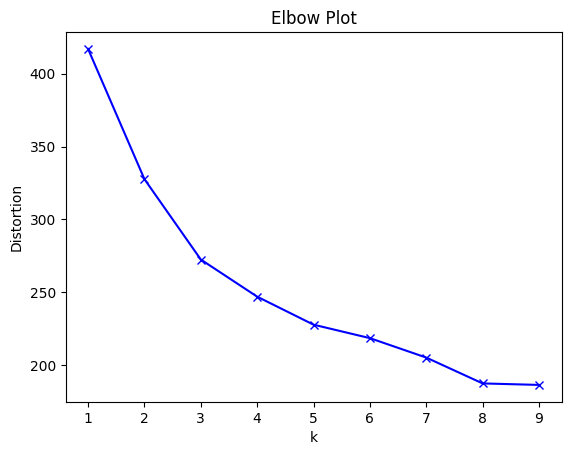

Silhouette Score: 0.2408734667662105
ARI: 0.38273084348578656

Cluster ID: 0
Purity Score: 15.38%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 13

Cluster ID: 1
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 11

Cluster ID: 2
Purity Score: 36.36%
Dominant Topic: 15
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 11

Cluster ID: 3
Purity Score: 92.31%
Dominant Topic: 11
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 13

Cluster ID: 4
Purity Score: 50.0%
Dominant Topic: 12
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 5
Purity Score: 100.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 4

Cluster ID: 6
Purity Score: 50.0%
Dominant Topic: 15
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 7
Purity Score: 100.0%
Dominant Topic: 1

In [91]:
tokens_c_data_purity = k_encode_purity(10, tokens_c_bow_array, tokens_c_bow_df, c_data)

### Tokens CDC_Data

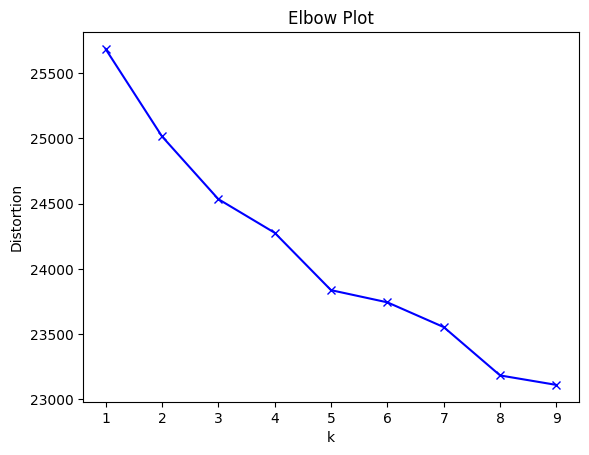

Silhouette Score: 0.03794007351985151
ARI: 0.019900211831469585

Cluster ID: 0
Purity Score: 63.64%
Dominant Topic: 103
Number of Questions in Dominant Topic: 7
Topic Questions in Cluster: 11

Cluster ID: 1
Purity Score: 28.3%
Dominant Topic: 52
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 53

Cluster ID: 2
Purity Score: 22.22%
Dominant Topic: 63
Number of Questions in Dominant Topic: 24
Topic Questions in Cluster: 108

Cluster ID: 3
Purity Score: 15.45%
Dominant Topic: 8
Number of Questions in Dominant Topic: 17
Topic Questions in Cluster: 110

Cluster ID: 4
Purity Score: 25.81%
Dominant Topic: 66
Number of Questions in Dominant Topic: 24
Topic Questions in Cluster: 93

Cluster ID: 5
Purity Score: 9.62%
Dominant Topic: 66
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 156

Cluster ID: 6
Purity Score: 8.31%
Dominant Topic: 42
Number of Questions in Dominant Topic: 70
Topic Questions in Cluster: 842

Cluster ID: 7
Purity Score: 9.89%
Domin

In [92]:
tokens_cdc_data_purity = k_encode_purity(10, tokens_cdc_bow_array, tokens_cdc_bow_df, cdc_data)

### Tokens Class_Data

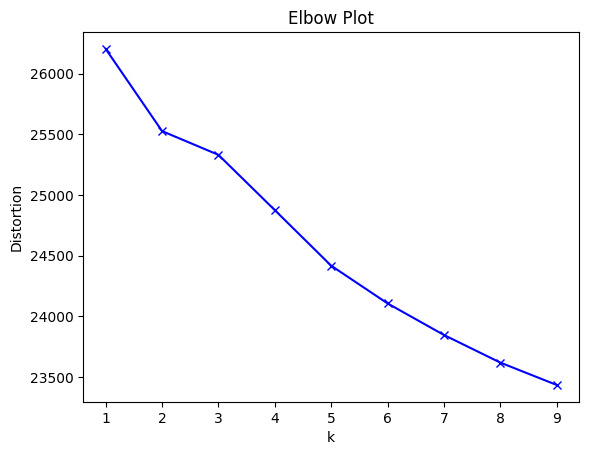

Silhouette Score: 0.031074155933428035
ARI: 0.021169820356778175

Cluster ID: 0
Purity Score: 7.72%
Dominant Topic: 44
Number of Questions in Dominant Topic: 70
Topic Questions in Cluster: 907

Cluster ID: 1
Purity Score: 10.74%
Dominant Topic: 127
Number of Questions in Dominant Topic: 16
Topic Questions in Cluster: 149

Cluster ID: 2
Purity Score: 9.76%
Dominant Topic: 113
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 123

Cluster ID: 3
Purity Score: 100.0%
Dominant Topic: 58
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 1

Cluster ID: 4
Purity Score: 14.67%
Dominant Topic: 70
Number of Questions in Dominant Topic: 27
Topic Questions in Cluster: 184

Cluster ID: 5
Purity Score: 16.19%
Dominant Topic: 9
Number of Questions in Dominant Topic: 17
Topic Questions in Cluster: 105

Cluster ID: 6
Purity Score: 18.37%
Dominant Topic: 73
Number of Questions in Dominant Topic: 27
Topic Questions in Cluster: 147

Cluster ID: 7
Purity Score: 100.0%


In [93]:
tokens_class_data_purity = k_encode_purity(10, tokens_class_bow_array, tokens_class_bow_df, class_data)

## Bigram Purity Scores

### Bigram C_Data

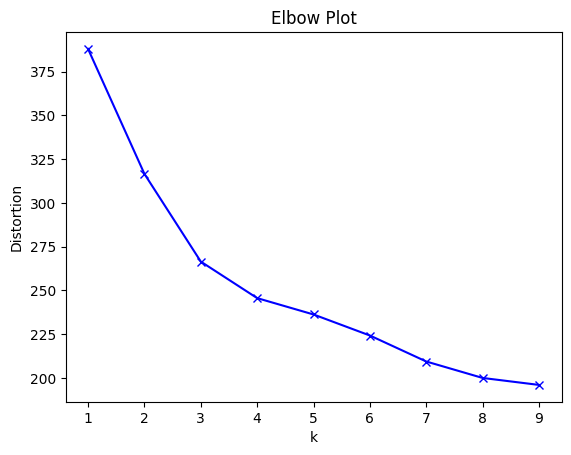

Silhouette Score: 0.1955694949987254
ARI: 0.1842690118401108

Cluster ID: 0
Purity Score: 17.39%
Dominant Topic: 15
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 23

Cluster ID: 1
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 9
Topic Questions in Cluster: 9

Cluster ID: 2
Purity Score: 100.0%
Dominant Topic: 10
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 1

Cluster ID: 3
Purity Score: 100.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 4

Cluster ID: 4
Purity Score: 83.33%
Dominant Topic: 11
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 12

Cluster ID: 5
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 1

Cluster ID: 6
Purity Score: 50.0%
Dominant Topic: 3
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 7
Purity Score: 100.0%
Dominant Topic: 14
N

In [94]:
bigram_c_data_purity = k_encode_purity(10, bigram_c_bow_array, bigram_c_bow_df, c_data)

### Bigram CDC_Data

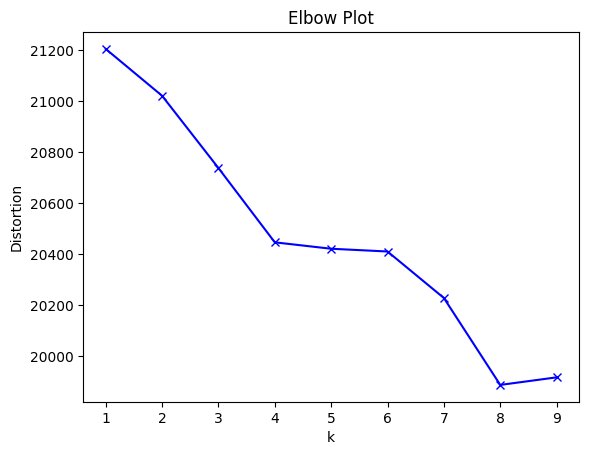

Silhouette Score: 0.00465882886032711
ARI: 0.0018483690439239902

Cluster ID: 0
Purity Score: 50.0%
Dominant Topic: 84
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 1
Purity Score: 23.08%
Dominant Topic: 0
Number of Questions in Dominant Topic: 6
Topic Questions in Cluster: 26

Cluster ID: 2
Purity Score: 8.77%
Dominant Topic: 44
Number of Questions in Dominant Topic: 5
Topic Questions in Cluster: 57

Cluster ID: 3
Purity Score: 21.43%
Dominant Topic: 42
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 14

Cluster ID: 4
Purity Score: 6.04%
Dominant Topic: 63
Number of Questions in Dominant Topic: 89
Topic Questions in Cluster: 1473

Cluster ID: 5
Purity Score: 33.33%
Dominant Topic: 7
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 3

Cluster ID: 6
Purity Score: 40.0%
Dominant Topic: 63
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 5

Cluster ID: 7
Purity Score: 50.0%
Dominant Topic: 5

In [95]:
bigram_cdc_data_purity = k_encode_purity(10, bigram_cdc_bow_array, bigram_cdc_bow_df, cdc_data)

### Bigram Class_Data

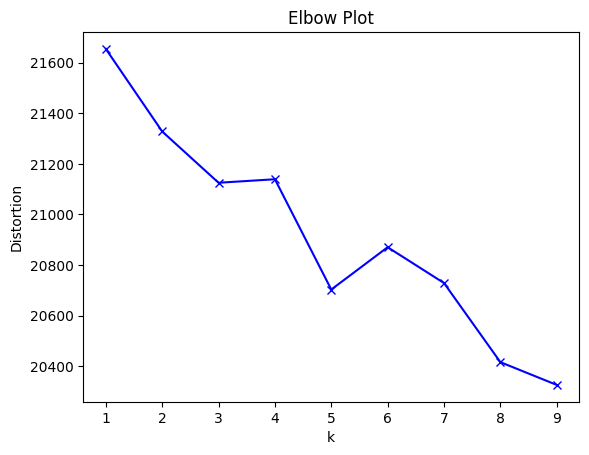

Silhouette Score: -0.05346110448451115
ARI: 0.0006438262074501736

Cluster ID: 0
Purity Score: 50.0%
Dominant Topic: 23
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 1
Purity Score: 23.08%
Dominant Topic: 70
Number of Questions in Dominant Topic: 6
Topic Questions in Cluster: 26

Cluster ID: 2
Purity Score: 8.93%
Dominant Topic: 44
Number of Questions in Dominant Topic: 5
Topic Questions in Cluster: 56

Cluster ID: 3
Purity Score: 7.55%
Dominant Topic: 73
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 106

Cluster ID: 4
Purity Score: 25.0%
Dominant Topic: 21
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 4

Cluster ID: 5
Purity Score: 6.67%
Dominant Topic: 119
Number of Questions in Dominant Topic: 6
Topic Questions in Cluster: 90

Cluster ID: 6
Purity Score: 33.33%
Dominant Topic: 14
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 3

Cluster ID: 7
Purity Score: 33.33%
Dominant Topic:

In [96]:
bigram_class_data_purity = k_encode_purity(10, bigram_class_bow_array, bigram_class_bow_df, class_data)

## Lemma Purity Scores

### Lemma C_Data

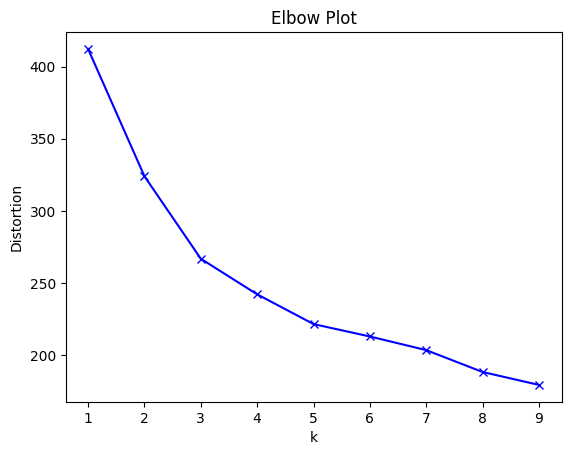

Silhouette Score: 0.23594706400791815
ARI: 0.3965544314587586

Cluster ID: 0
Purity Score: 18.18%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 11

Cluster ID: 1
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 11

Cluster ID: 2
Purity Score: 100.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 4

Cluster ID: 3
Purity Score: 85.71%
Dominant Topic: 11
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 14

Cluster ID: 4
Purity Score: 36.36%
Dominant Topic: 15
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 11

Cluster ID: 5
Purity Score: 50.0%
Dominant Topic: 3
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 6
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 1

Cluster ID: 7
Purity Score: 100.0%
Dominant Topic: 1

In [97]:
lemma_c_data_purity = k_encode_purity(10, lemma_c_bow_array, lemma_c_bow_df, c_data)

### Lemma CDC_Data

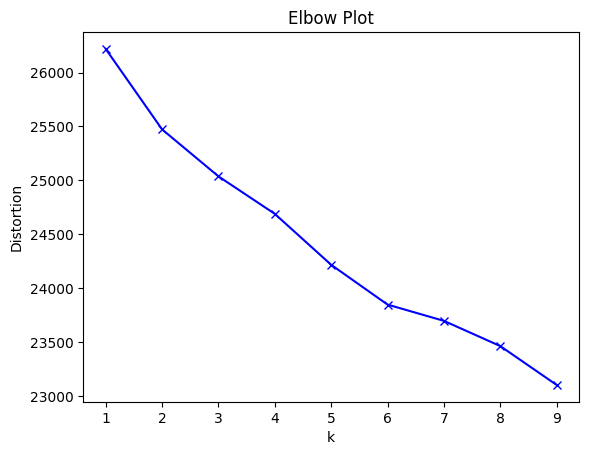

Silhouette Score: 0.0417080688050948
ARI: 0.01868514246770442

Cluster ID: 0
Purity Score: 100.0%
Dominant Topic: 41
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 4

Cluster ID: 1
Purity Score: 11.32%
Dominant Topic: 66
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 159

Cluster ID: 2
Purity Score: 11.44%
Dominant Topic: 92
Number of Questions in Dominant Topic: 23
Topic Questions in Cluster: 201

Cluster ID: 3
Purity Score: 100.0%
Dominant Topic: 93
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 8

Cluster ID: 4
Purity Score: 7.25%
Dominant Topic: 66
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 207

Cluster ID: 5
Purity Score: 60.0%
Dominant Topic: 63
Number of Questions in Dominant Topic: 6
Topic Questions in Cluster: 10

Cluster ID: 6
Purity Score: 8.3%
Dominant Topic: 63
Number of Questions in Dominant Topic: 74
Topic Questions in Cluster: 892

Cluster ID: 7
Purity Score: 66.67%
Dominant To

In [98]:
lemma_cdc_data_purity = k_encode_purity(10, lemma_cdc_bow_array, lemma_cdc_bow_df, cdc_data)

### Lemma Class_Data

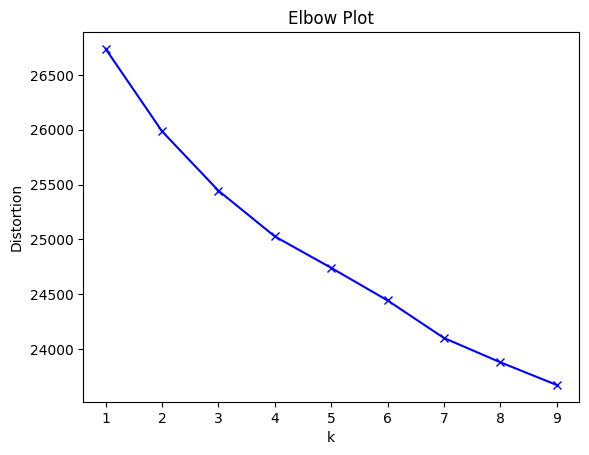

Silhouette Score: 0.03513613078396505
ARI: 0.022398860566789025

Cluster ID: 0
Purity Score: 24.56%
Dominant Topic: 73
Number of Questions in Dominant Topic: 28
Topic Questions in Cluster: 114

Cluster ID: 1
Purity Score: 23.91%
Dominant Topic: 86
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 46

Cluster ID: 2
Purity Score: 100.0%
Dominant Topic: 103
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 8

Cluster ID: 3
Purity Score: 100.0%
Dominant Topic: 67
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 3

Cluster ID: 4
Purity Score: 40.0%
Dominant Topic: 70
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 45

Cluster ID: 5
Purity Score: 10.28%
Dominant Topic: 39
Number of Questions in Dominant Topic: 26
Topic Questions in Cluster: 253

Cluster ID: 6
Purity Score: 100.0%
Dominant Topic: 86
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 2

Cluster ID: 7
Purity Score: 11.79%
Dominant

In [99]:
lemma_class_data_purity = k_encode_purity(10, lemma_class_bow_array, lemma_class_bow_df, class_data)

## Lemma Purity Scores

### Porter C_Data

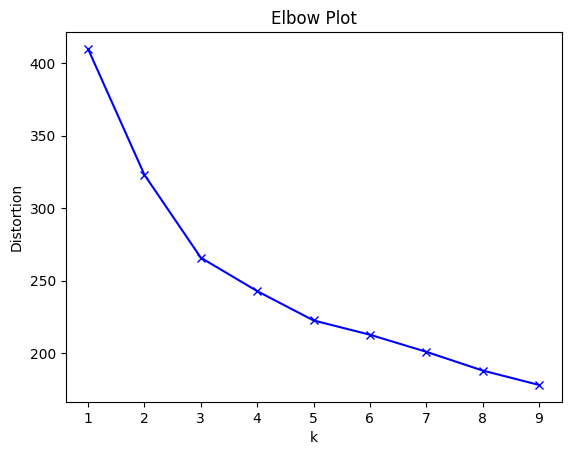

Silhouette Score: 0.2137712277406719
ARI: 0.42893502124645894

Cluster ID: 0
Purity Score: 50.0%
Dominant Topic: 15
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 1
Purity Score: 86.67%
Dominant Topic: 11
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 15

Cluster ID: 2
Purity Score: 100.0%
Dominant Topic: 1
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 3

Cluster ID: 3
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 11

Cluster ID: 4
Purity Score: 15.38%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 13

Cluster ID: 5
Purity Score: 100.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 4

Cluster ID: 6
Purity Score: 50.0%
Dominant Topic: 12
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 7
Purity Score: 100.0%
Dominant Topic: 14


In [100]:
porter_c_data_purity = k_encode_purity(10, porter_c_bow_array, porter_c_bow_df, c_data)

### Porter CDC_Data

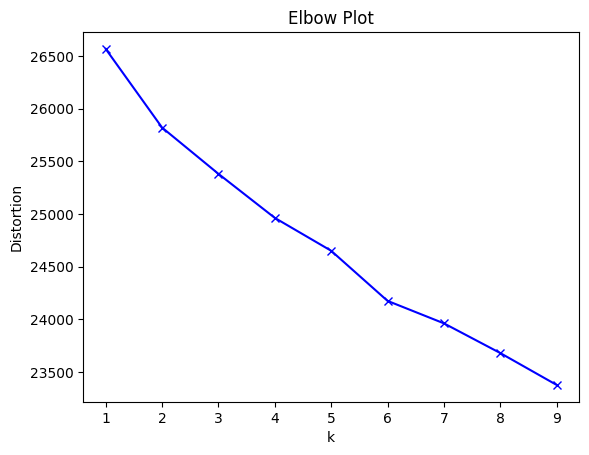

Silhouette Score: 0.040839678161127435
ARI: 0.018436946531893268

Cluster ID: 0
Purity Score: 100.0%
Dominant Topic: 93
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 8

Cluster ID: 1
Purity Score: 16.88%
Dominant Topic: 8
Number of Questions in Dominant Topic: 26
Topic Questions in Cluster: 154

Cluster ID: 2
Purity Score: 9.38%
Dominant Topic: 66
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 160

Cluster ID: 3
Purity Score: 48.78%
Dominant Topic: 63
Number of Questions in Dominant Topic: 20
Topic Questions in Cluster: 41

Cluster ID: 4
Purity Score: 13.64%
Dominant Topic: 63
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 132

Cluster ID: 5
Purity Score: 38.3%
Dominant Topic: 0
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 47

Cluster ID: 6
Purity Score: 20.0%
Dominant Topic: 103
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 40

Cluster ID: 7
Purity Score: 7.61%
Dominant

In [101]:
porter_cdc_data_purity = k_encode_purity(10, porter_cdc_bow_array, porter_cdc_bow_df, cdc_data)

### Porter Class_Data

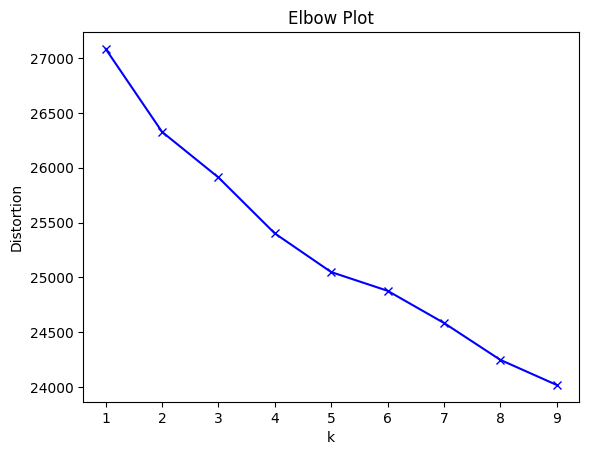

Silhouette Score: 0.06847380547083326
ARI: 0.011832798644442541

Cluster ID: 0
Purity Score: 7.48%
Dominant Topic: 127
Number of Questions in Dominant Topic: 16
Topic Questions in Cluster: 214

Cluster ID: 1
Purity Score: 27.03%
Dominant Topic: 70
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 37

Cluster ID: 2
Purity Score: 100.0%
Dominant Topic: 67
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 3

Cluster ID: 3
Purity Score: 13.98%
Dominant Topic: 70
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 93

Cluster ID: 4
Purity Score: 11.04%
Dominant Topic: 73
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 163

Cluster ID: 5
Purity Score: 16.67%
Dominant Topic: 9
Number of Questions in Dominant Topic: 21
Topic Questions in Cluster: 126

Cluster ID: 6
Purity Score: 100.0%
Dominant Topic: 43
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 4

Cluster ID: 7
Purity Score: 6.33%
Dominan

In [102]:
porter_class_data_purity = k_encode_purity(10, porter_class_bow_array, porter_class_bow_df, class_data)

## Lancaster Purity Scores

### Lancaster C_Data

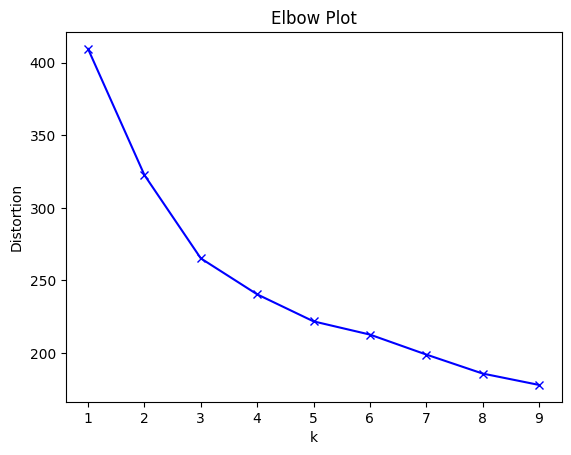

Silhouette Score: 0.2426828252552318
ARI: 0.3989747686572132

Cluster ID: 0
Purity Score: 18.18%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 11

Cluster ID: 1
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 11

Cluster ID: 2
Purity Score: 100.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 4

Cluster ID: 3
Purity Score: 92.31%
Dominant Topic: 11
Number of Questions in Dominant Topic: 12
Topic Questions in Cluster: 13

Cluster ID: 4
Purity Score: 30.77%
Dominant Topic: 15
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 13

Cluster ID: 5
Purity Score: 50.0%
Dominant Topic: 12
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 2

Cluster ID: 6
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 1

Cluster ID: 7
Purity Score: 50.0%
Dominant Topic: 3


In [103]:
lancaster_c_data_purity = k_encode_purity(10, lancaster_c_bow_array, lancaster_c_bow_df, c_data)

### Lancaster CDC_Data

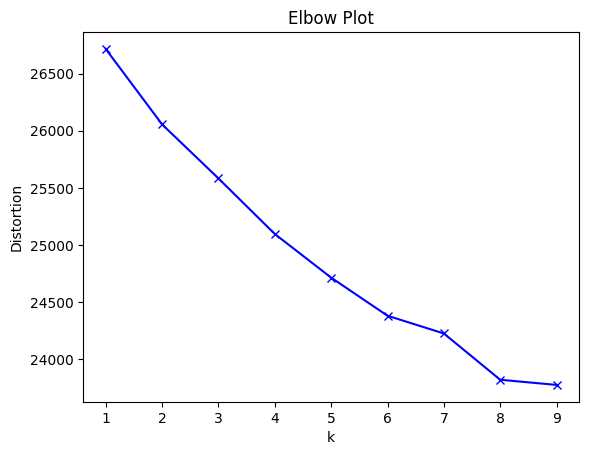

Silhouette Score: 0.03381858054015928
ARI: 0.011511742861773415

Cluster ID: 0
Purity Score: 45.78%
Dominant Topic: 63
Number of Questions in Dominant Topic: 38
Topic Questions in Cluster: 83

Cluster ID: 1
Purity Score: 30.77%
Dominant Topic: 92
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 13

Cluster ID: 2
Purity Score: 11.18%
Dominant Topic: 8
Number of Questions in Dominant Topic: 19
Topic Questions in Cluster: 170

Cluster ID: 3
Purity Score: 9.4%
Dominant Topic: 23
Number of Questions in Dominant Topic: 14
Topic Questions in Cluster: 149

Cluster ID: 4
Purity Score: 42.86%
Dominant Topic: 63
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 7

Cluster ID: 5
Purity Score: 45.71%
Dominant Topic: 114
Number of Questions in Dominant Topic: 16
Topic Questions in Cluster: 35

Cluster ID: 6
Purity Score: 7.14%
Dominant Topic: 42
Number of Questions in Dominant Topic: 77
Topic Questions in Cluster: 1078

Cluster ID: 7
Purity Score: 100.0%
Domina

In [104]:
lancaster_cdc_data_purity = k_encode_purity(10, lancaster_cdc_bow_array, lancaster_cdc_bow_df, cdc_data)

### Lancaster Class_Data

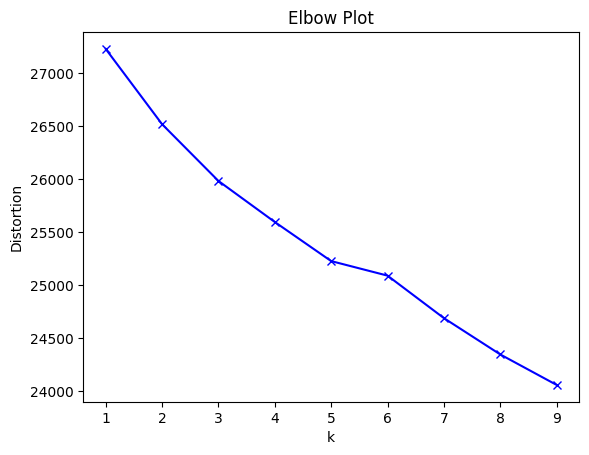

Silhouette Score: 0.0487165897698681
ARI: 0.014336814629831636

Cluster ID: 0
Purity Score: 11.19%
Dominant Topic: 127
Number of Questions in Dominant Topic: 16
Topic Questions in Cluster: 143

Cluster ID: 1
Purity Score: 12.5%
Dominant Topic: 91
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 80

Cluster ID: 2
Purity Score: 13.41%
Dominant Topic: 9
Number of Questions in Dominant Topic: 24
Topic Questions in Cluster: 179

Cluster ID: 3
Purity Score: 66.67%
Dominant Topic: 9
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 15

Cluster ID: 4
Purity Score: 10.71%
Dominant Topic: 73
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 168

Cluster ID: 5
Purity Score: 20.41%
Dominant Topic: 85
Number of Questions in Dominant Topic: 10
Topic Questions in Cluster: 49

Cluster ID: 6
Purity Score: 39.47%
Dominant Topic: 70
Number of Questions in Dominant Topic: 15
Topic Questions in Cluster: 38

Cluster ID: 7
Purity Score: 6.42%
Domin

In [105]:
lancaster_class_data_purity = k_encode_purity(10, lancaster_class_bow_array, lancaster_class_bow_df, class_data)

## Postag Purity Scores

### Postag C_Data

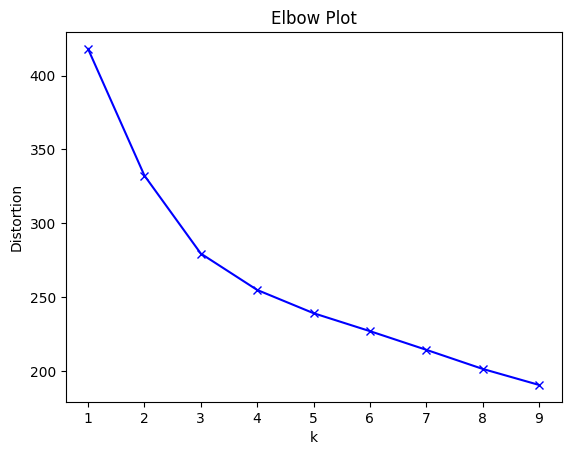

Silhouette Score: 0.18258875736013142
ARI: 0.35025776878854165

Cluster ID: 0
Purity Score: 100.0%
Dominant Topic: 8
Number of Questions in Dominant Topic: 1
Topic Questions in Cluster: 1

Cluster ID: 1
Purity Score: 16.67%
Dominant Topic: 6
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 12

Cluster ID: 2
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 2

Cluster ID: 3
Purity Score: 81.25%
Dominant Topic: 11
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 16

Cluster ID: 4
Purity Score: 100.0%
Dominant Topic: 11
Number of Questions in Dominant Topic: 5
Topic Questions in Cluster: 5

Cluster ID: 5
Purity Score: 36.36%
Dominant Topic: 15
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 11

Cluster ID: 6
Purity Score: 100.0%
Dominant Topic: 14
Number of Questions in Dominant Topic: 8
Topic Questions in Cluster: 8

Cluster ID: 7
Purity Score: 50.0%
Dominant Topic: 15

In [106]:
postag_c_data_purity = k_encode_purity(10, postag_c_bow_array, postag_c_bow_df, c_data)

### Postag CDC_Data

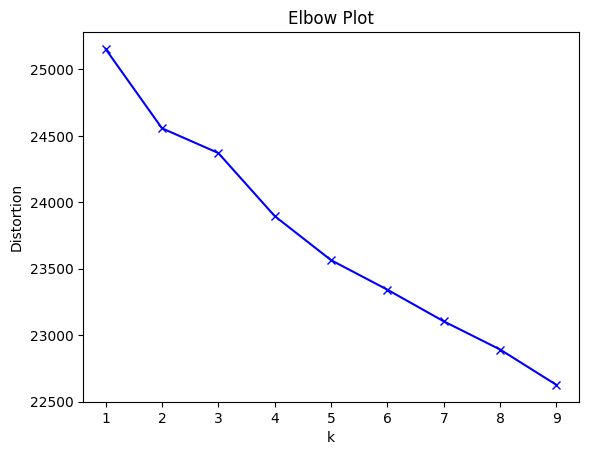

Silhouette Score: 0.0032568286457407033
ARI: 0.020499917575898953

Cluster ID: 0
Purity Score: 9.09%
Dominant Topic: 66
Number of Questions in Dominant Topic: 13
Topic Questions in Cluster: 143

Cluster ID: 1
Purity Score: 13.33%
Dominant Topic: 66
Number of Questions in Dominant Topic: 24
Topic Questions in Cluster: 180

Cluster ID: 2
Purity Score: 66.67%
Dominant Topic: 63
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 6

Cluster ID: 3
Purity Score: 20.61%
Dominant Topic: 8
Number of Questions in Dominant Topic: 27
Topic Questions in Cluster: 131

Cluster ID: 4
Purity Score: 11.96%
Dominant Topic: 83
Number of Questions in Dominant Topic: 11
Topic Questions in Cluster: 92

Cluster ID: 5
Purity Score: 33.33%
Dominant Topic: 89
Number of Questions in Dominant Topic: 2
Topic Questions in Cluster: 6

Cluster ID: 6
Purity Score: 10.29%
Dominant Topic: 92
Number of Questions in Dominant Topic: 21
Topic Questions in Cluster: 204

Cluster ID: 7
Purity Score: 100.0%
Domi

In [107]:
postag_cdc_data_purity = k_encode_purity(10, postag_cdc_bow_array, postag_cdc_bow_df, cdc_data)

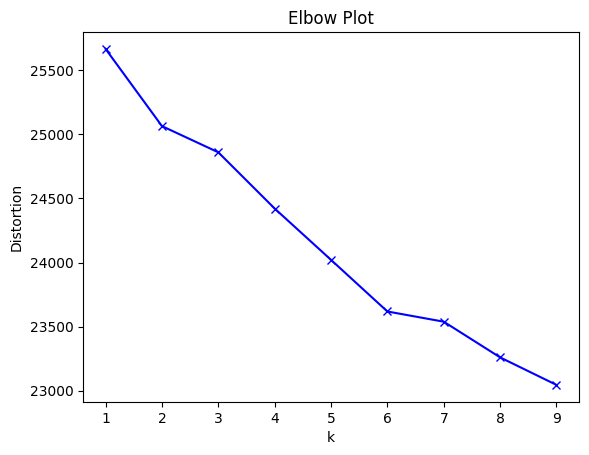

Silhouette Score: 0.029629850965889156
ARI: 0.011788661403446938

Cluster ID: 0
Purity Score: 100.0%
Dominant Topic: 23
Number of Questions in Dominant Topic: 3
Topic Questions in Cluster: 3

Cluster ID: 1
Purity Score: 6.18%
Dominant Topic: 147
Number of Questions in Dominant Topic: 60
Topic Questions in Cluster: 971

Cluster ID: 2
Purity Score: 10.82%
Dominant Topic: 101
Number of Questions in Dominant Topic: 21
Topic Questions in Cluster: 194

Cluster ID: 3
Purity Score: 63.64%
Dominant Topic: 116
Number of Questions in Dominant Topic: 7
Topic Questions in Cluster: 11

Cluster ID: 4
Purity Score: 12.08%
Dominant Topic: 73
Number of Questions in Dominant Topic: 18
Topic Questions in Cluster: 149

Cluster ID: 5
Purity Score: 50.0%
Dominant Topic: 70
Number of Questions in Dominant Topic: 4
Topic Questions in Cluster: 8

Cluster ID: 6
Purity Score: 14.41%
Dominant Topic: 9
Number of Questions in Dominant Topic: 17
Topic Questions in Cluster: 118

Cluster ID: 7
Purity Score: 9.74%
Domin

In [108]:
postag_class_data_purity = k_encode_purity(10, postag_class_bow_array, postag_class_bow_df, class_data)